In [21]:
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def mse_function(answer, prediction):
    mse = ((answer - prediction)**2).mean(axis=0)
    for i in range(len(answer.shape)-1):
        mse = mse.mean(axis=0)
    return mse

Data to test on

In [23]:
# n = 10000
# time_span = 5
# c = 100
# time_step = 0.1
# integration_time_step = 0.01
# number_timesteps_predict = 2
# std = 0

# Load the observations
# name = f"{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.','')}"
# dictionary = np.load(f"data_dictionaries/data_{name}.npy", allow_pickle=True).item()
# observations = dictionary["observations"]
# c = 25
# predictions = dictionary[c]
# print(dictionary)

# # Calculate the mean squared error between the true observation and the imperfect model's prediction
# finalmse = mse_function(observations_scaled[:,-1,:], predictions_scaled[:,-1,:])
# print(finalmse)

In [24]:
# Variables relating to the data you want to load
n = 10000
time_span = 5
time_step = 0.1
integration_time_step = 0.01
number_timesteps_predict = 2
std = 0.01

In [25]:
name = f"{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
MLonly_model = keras.models.load_model(f'saved_models/timesteps_{number_timesteps_predict}/MLonly_{name}.keras')

In [28]:
c_array = np.array([15, 20, 30])
finalmse = np.zeros(len(c_array))
loss_physical = np.zeros(len(c_array))

name = f"{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
dictionary = np.load(f"data_dictionaries/data_{name}.npy", allow_pickle=True).item()
# dictionary['mse_imperfect_predictions'] = {}
# dictionary['physical_loss'] = {}
test_observations = dictionary["observations"]

for i, c in enumerate(c_array):
    test_predictions = dictionary[c]

    # Calculate the mean squared error between the true observation and the imperfect model's prediction
    finalmse[i] = mse_function(test_observations[:,-1,:], test_predictions)
    print(f"mse of imperfect predictions = {finalmse[i]}")
    dictionary['mse_imperfect_predictions'][c] = finalmse[i]

    # #### Plot!!
    # print(f'c={c}')
    # for i in range(2):
    #     plt.plot(test_observations[i,-5:,1], test_observations[i,-5:,2])
    #     plt.scatter(test_predictions[i,1], test_predictions[i,2])
    #     plt.show()
    # #####

    # if c != np.inf:
    #     print('c not infinity') 
    #     test_X = {"input_ob": test_observations[:,:-number_timesteps_predict,:], "input_pred": test_predictions}

    #     loaded_model = keras.models.load_model(f'saved_models/timesteps_{number_timesteps_predict}/physical_model_c{int(c)}_{name}.keras')
    #     print('loaded!')
    #     loss_physical[i] = loaded_model.evaluate(x = test_X, y = test_observations[:,-1,:])
    #     print('evaluated!')
    #     print(f"loss = {loss_physical[i]}")
    #     dictionary['physical_loss'][c] = loss_physical[i]

# MLonly_loss = MLonly_model.evaluate(x = test_observations[:,:-number_timesteps_predict,:], y = test_observations[:,-1,:])
# print(f'ML only loss = {MLonly_loss}')
# dictionary['MLonly_loss'] = MLonly_loss
np.save(f"data_dictionaries/data_{name}", dictionary)

mse of imperfect predictions = 0.05434052004643283
mse of imperfect predictions = 0.054596787598484346
mse of imperfect predictions = 0.007013278982959084


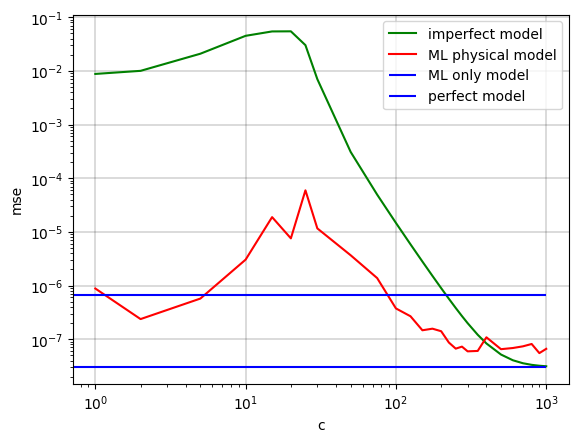

In [27]:
c_array = [1,2,5,10,15, 20, 25, 30,50,75,100,125,150,175,200,225,250,275,300,350,400,500,600,700,800,900,1000]
name = f"{n}_{time_span}_{str(time_step).replace('.', '')}_{str(integration_time_step).replace('.', '')}_{number_timesteps_predict}_{str(std).replace('.', '')}"
dictionary = np.load(f"data_dictionaries/data_{name}.npy", allow_pickle=True).item()
finalmse = np.zeros(len(c_array))
loss_physical = np.zeros(len(c_array))
MLonly_loss = dictionary['MLonly_loss']
mse_perfect_model_prediction = dictionary['mse_imperfect_predictions'][np.inf]

for i, c in enumerate(c_array):
    finalmse[i] = dictionary['mse_imperfect_predictions'][c]
    loss_physical[i] = dictionary['physical_loss'][c]

plt.plot(c_array,finalmse, label = 'imperfect model', color = 'g')
plt.plot(c_array, loss_physical, label = 'ML physical model', color = 'r')
plt.hlines(MLonly_loss, 0,1000, label = 'ML only model', color = 'b')
plt.hlines(mse_perfect_model_prediction, 0,1000, label = 'perfect model', color = 'b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('c')
plt.ylabel('mse')
plt.grid(which='major', color='black', linestyle='-', linewidth = 0.2)
# plt.grid(which='minor', color='grey', linestyle='-')
plt.legend()
plt.savefig(f'mse_{name}')
